# 1. 한글 폰트 사용

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 2. 라이브러리 import 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 3. 데이터 불러오기 

In [4]:
# train file load
train_df = pd.read_csv('./train.csv')
train_df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [5]:
# test file load
test_df = pd.read_csv('./test.csv')
test_df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [6]:
# submission file load
submission_df = pd.read_csv('./sample_submission.csv')
submission_df.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [7]:
# null 값 확인
pd.isnull(train_df).sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [8]:
# 중식 식사인원이 0인 날 확인
train_df.loc[train_df['중식계']==0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계


In [9]:
# 석식 식사인원이 0인 날 확인
train_df.loc[train_df['석식계']==0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


# 4. 데이터 전처리

In [10]:
# 석식 식사인원이 0인 날 제거
no_zero_df = train_df.loc[train_df['석식계']!=0]
len(no_zero_df)

1162

In [11]:
# feature들을 묶음
target_names = ['중식계', '석식계']
category_feature = ['요일']
weighted_features = ['중식메뉴', '석식메뉴']

In [12]:
# arrange X and y
target1 = no_zero_df[target_names[0]]
target2 = no_zero_df[target_names[1]]
features = no_zero_df.drop([target_names[0], target_names[1]],axis=1,inplace=False)
features.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ..."
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무..."
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기..."
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포..."
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:..."


In [13]:
# 휴일전/후 flag 추가
# day_before_holiday = []
# day_after_holiday = []
# for e in features:
    
    
# features['휴일전'] = np.where(features['요일']=='금'|features['일자']==day_before_holiday , 1, 0)
# features['휴일후'] = np.where(features['요일']=='월'|features['일자']==day_after_holiday , 1, 0)
# features

### 각 feature들의 영향과 아웃라이어

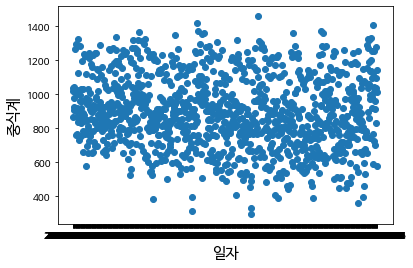

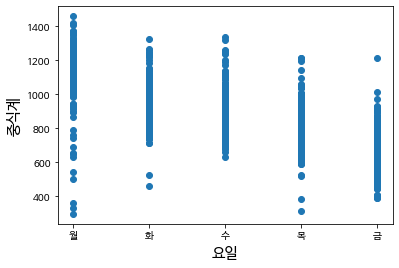

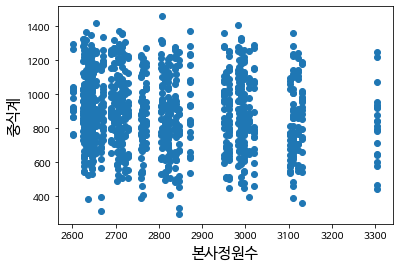

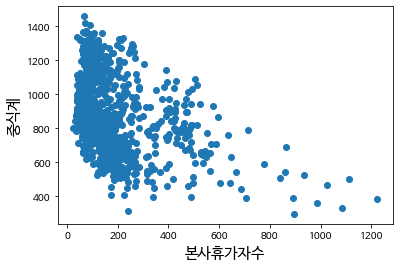

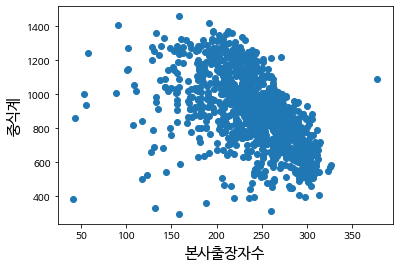

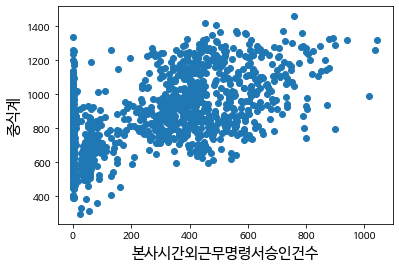

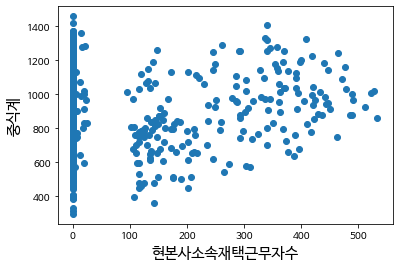

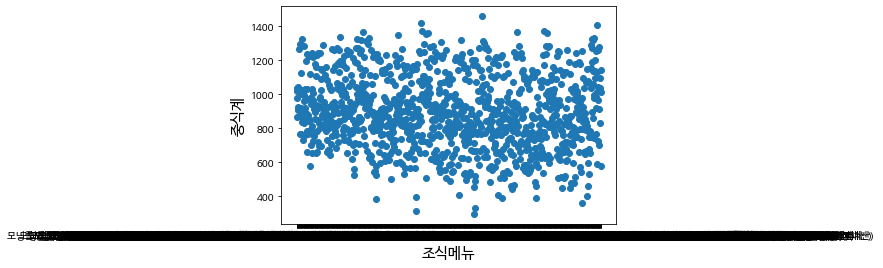

In [14]:
# 중식계에서 feature의 영향과 아웃라이어를 찾기 위한 시각화
for feature in features.drop(weighted_features, axis=1, inplace=False):
    plt.scatter(x = features[feature], y = target1)
    plt.ylabel(target_names[0], fontsize=15)
    plt.xlabel(feature, fontsize=15)
    plt.show()

In [15]:
# remove outlier
cond = features['본사출장자수'] > 350
outlier_index = features[cond].index
# print('Outlier index :', outlier_index.values)
print('features shape before Outlier is removed:', features.shape)
temp_features = features.drop(outlier_index , axis=0, inplace=False)
temp_target1 = target1.drop(outlier_index, axis=0, inplace=False)
temp_target2 = target2.drop(outlier_index, axis=0, inplace=False)
print('features shape after Outlier is removed:', temp_features.shape)

features shape before Outlier is removed: (1162, 10)
features shape after Outlier is removed: (1161, 10)


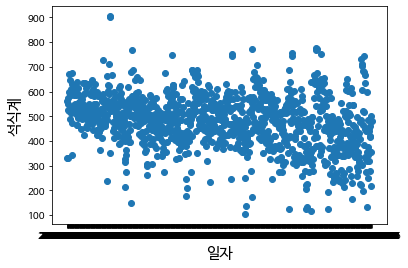

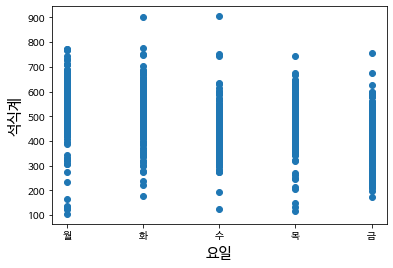

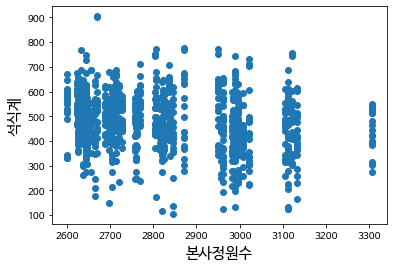

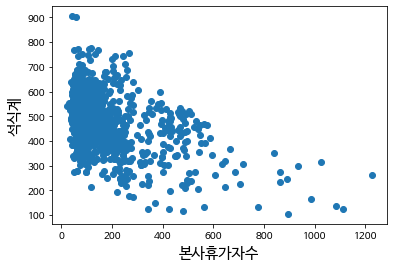

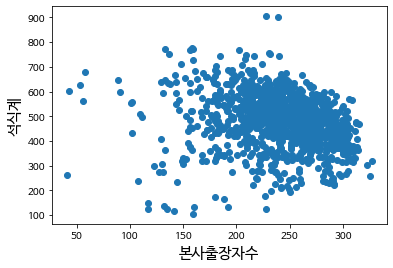

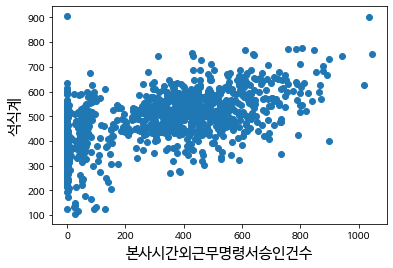

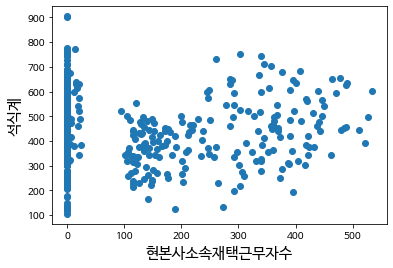

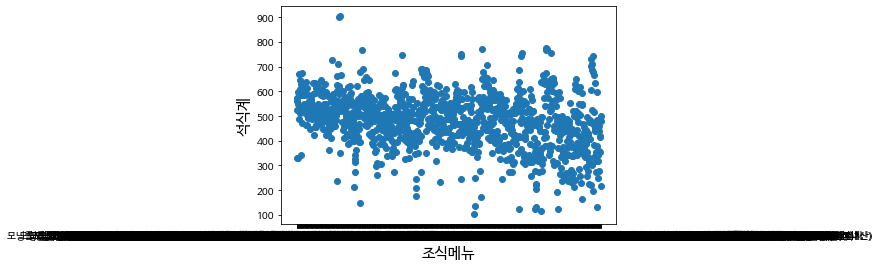

In [16]:
# 석식계에서 feature의 영향과 아웃라이어를 찾기 위한 시각화
for feature in temp_features.drop(weighted_features, axis=1, inplace=False):
    plt.scatter(x = temp_features[feature], y = temp_target2)
    plt.ylabel(target_names[1], fontsize=15)
    plt.xlabel(feature, fontsize=15)
    plt.show()

In [17]:
# remove outlier
cond = temp_target2>850
outlier_index2 = temp_target2[cond].index
print('features shape before Outlier is removed:', temp_features.shape)
no_outlier_features = temp_features.drop(outlier_index2 , axis=0, inplace=False)
no_outlier_target1 = temp_target1.drop(outlier_index2, axis=0, inplace=False)
no_outlier_target2 = temp_target2.drop(outlier_index2, axis=0, inplace=False)
print('features shape after Outlier is removed:', no_outlier_features.shape)

features shape before Outlier is removed: (1161, 10)
features shape after Outlier is removed: (1159, 10)


In [18]:
# 조식 메뉴 확인
print(len(no_outlier_features[no_outlier_features['조식메뉴'].str.contains('모닝롤')]))
print(len(no_outlier_features[no_outlier_features['조식메뉴'].str.contains('밥')]))

1154
1158


In [19]:
# 이를 통해 대부분의 조식은 빵이 포함된 양식 혹은 일반적인 한식이 제공됨을 알 수 있었다.
# 즉, 조식은 중식에 큰 영향을 주지 않을 것으로 파악되어 특징에서 제거하기로 했다.
no_breakfast_df = no_outlier_features.drop(['조식메뉴'], axis=1, inplace=False)
no_breakfast_df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ..."
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무..."
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기..."
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포..."
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:..."


In [20]:
# 메인 메뉴를 카테고리화
# 고기 / 생선 / 등등등

# for i in range(10):
#     print(no_breakfast_df.iloc[i]['중식메뉴'])
#     if(('고기' or '치킨' or '닭' or '돈육' or '오리') in no_breakfast_df.iloc[i]['중식메뉴']):
#         no_breakfast_df['menu_lun'] = 0
#     elif(('가자미' or '주꾸미' or '탕수어') in no_breakfast_df.iloc[i]['중식메뉴']):
#         no_breakfast_df['menu_lun'] = 1
#     else:
#         no_breakfast_df['menu_lun'] = 2

# no_breakfast_df.head(10)

### 데이터 정규화

In [21]:
# figure out the extent of distortion in features
non_category_features_index = no_breakfast_df.drop(['일자']+category_feature+weighted_features, axis=1, inplace=False).dtypes.index
skew_features = no_breakfast_df[non_category_features_index].apply(lambda x : skew(x))
print(skew_features.sort_values(ascending=False))

본사휴가자수            2.850556
현본사소속재택근무자수       2.537046
본사정원수             0.781106
본사시간외근무명령서승인건수    0.332068
본사출장자수           -0.893019
dtype: float64


In [22]:
# if the degree of distortion is high(>1 or <-1), log transformation is performed.
skew_features_need_change = skew_features[skew_features > 1]
no_breakfast_df[skew_features_need_change.index] = np.log1p(no_breakfast_df[skew_features_need_change.index])
no_breakfast_df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴
0,2016-02-01,월,2601,3.931826,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ..."
1,2016-02-02,화,2601,3.931826,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무..."
2,2016-02-03,수,2601,4.043051,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기..."
3,2016-02-04,목,2601,4.653960,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포..."
4,2016-02-05,금,2601,5.631212,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:..."


In [23]:
# if the log transformation is applied, the target column also needs to be normal distribution
y_target1_log = np.log1p(no_outlier_target1)
y_target2_log = np.log1p(no_outlier_target1)
print(y_target1_log.head())
print(y_target2_log.head())

0    6.946976
1    6.766192
2    6.925595
3    6.886532
4    6.830874
Name: 중식계, dtype: float64
0    6.946976
1    6.766192
2    6.925595
3    6.886532
4    6.830874
Name: 중식계, dtype: float64


In [24]:
# change the category feature to One-Hot Encoding
X_features_ohe = pd.get_dummies(no_breakfast_df, columns=category_feature)
X_features_ohe.head()

,일자,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,요일_금,요일_목,요일_수,요일_월,요일_화
0,2016-02-01,2601,3.931826,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",0,0,0,1,0
1,2016-02-02,2601,3.931826,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",0,0,0,0,1
2,2016-02-03,2601,4.043051,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",0,0,1,0,0
3,2016-02-04,2601,4.653960,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",0,1,0,0,0
4,2016-02-05,2601,5.631212,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",1,0,0,0,0


In [25]:
# 일자 제거
X_features = X_features_ohe.drop(['일자'], axis=1, inplace=False)
X_features

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,요일_금,요일_목,요일_수,요일_월,요일_화
0,2601,3.931826,150,238,0.000000,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",0,0,0,1,0
1,2601,3.931826,173,319,0.000000,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",0,0,0,0,1
2,2601,4.043051,180,111,0.000000,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",0,0,1,0,0
3,2601,4.653960,220,355,0.000000,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",0,1,0,0,0
4,2601,5.631212,181,34,0.000000,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2983,4.330733,198,4,5.971262,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,0,0,1,0,0
1201,2983,4.532599,231,462,5.863631,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,0,1,0,0,0
1202,2983,5.545177,248,1,5.717028,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,1,0,0,0,0
1203,2983,4.682131,153,616,5.793014,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,0,0,0,1,0


In [27]:
# 중식 인원 예측용 데이터 셋
X_features_lun = X_features.drop(['중식메뉴', '석식메뉴'], axis=1, inplace=False)
X_features_lun.head()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,요일_금,요일_목,요일_수,요일_월,요일_화
0,2601,3.931826,150,238,0.0,0,0,0,1,0
1,2601,3.931826,173,319,0.0,0,0,0,0,1
2,2601,4.043051,180,111,0.0,0,0,1,0,0
3,2601,4.653960,220,355,0.0,0,1,0,0,0
4,2601,5.631212,181,34,0.0,1,0,0,0,0


In [28]:
# 석식 인원 예측용 데이터 셋
X_features_din = X_features.drop(['중식메뉴', '석식메뉴'], axis=1, inplace=False)
X_features_din.head()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,요일_금,요일_목,요일_수,요일_월,요일_화
0,2601,3.931826,150,238,0.0,0,0,0,1,0
1,2601,3.931826,173,319,0.0,0,0,0,0,1
2,2601,4.043051,180,111,0.0,0,0,1,0,0
3,2601,4.653960,220,355,0.0,0,1,0,0,0
4,2601,5.631212,181,34,0.0,1,0,0,0,0


In [29]:
# split train/test data based on feature dataset with One-Hot encoding
# 중식
X_lun_train, X_lun_test, y_lun_train, y_lun_test = train_test_split(X_features_lun, y_target1_log, test_size=0.2, random_state=17)

# 석식
X_din_train, X_din_test, y_din_train, y_din_test = train_test_split(X_features_din, y_target2_log, test_size=0.2, random_state=17)

# 5. 학습

In [30]:
# declare the model
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
en_reg = ElasticNet()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [31]:
# 최적의 하이퍼 파라미터를 찾는 함수 
def get_best_params(model, params, X, y):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV best average RMSE value: {1}, best alpha:{2}'.format(model.__class__.__name__,np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [32]:
# 중식계 find best parameters
ridge_params = { 'alpha':[0.01, 0.05, 0.09, 0.1, 0.11, 0.12, 0.5, 1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 30, 40, 50]}
lasso_params = { 'alpha':[0.0001, 0.001, 0.005, 0.007, 0.009, 0.01, 0.05, 0.09, 0.1]}
en_params = { 'alpha':[0.000001, 0.00001, 0.00005, 0.00007, 0.0001, 0.0005, 0.0007]}
dt_params = {'max_depth':[1,3,5,6,7,8,9,11,13,15]}
rf_params = {'n_estimators':[350], 'max_depth' : [12,13], 'min_samples_leaf' : [1], 'min_samples_split' : [2]}
gbm_params = {'learning_rate': [0.13], 'n_estimators':[200], 'subsample': [0.9]}
xgb_params = {'colsample_bytree': [1], 'eta': [0.1], 'max_depth': [5], 'min_child_weight': [1], 'n_estimators':[100]}
lgbm_params = {'learning_rate': [1], 'max_depth': [1], 'min_child_samples': [2], 'n_estimators':[400], 'num_leaves': [2]}

# best_rige = get_best_params(ridge_reg, ridge_params, X_lun_train, y_lun_train)
# best_lasso = get_best_params(lasso_reg, lasso_params, X_lun_train, y_lun_train)
# best_en = get_best_params(en_reg, en_params, X_lun_train, y_lun_train)
# best_dt = get_best_params(dt_reg, dt_params, X_lun_train, y_lun_train)
# best_rf = get_best_params(rf_reg, rf_params, X_lun_train, y_lun_train)
# best_gbm = get_best_params(gbm_reg, gbm_params, X_lun_train, y_lun_train)

# best_xgb = get_best_params(xgb_reg, xgb_params, X_lun_train, y_lun_train)
# best_lgbm = get_best_params(lgbm_reg, lgbm_params, X_lun_train, y_lun_train)

In [46]:
# 석식계 find best parameters
ridge_params = { 'alpha':[0.01, 0.05, 0.09, 0.1, 0.11, 0.12, 0.5, 1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 30, 40, 50]}
lasso_params = { 'alpha':[0.0001, 0.001, 0.005, 0.007, 0.009, 0.01, 0.05, 0.09, 0.1]}
en_params = { 'alpha':[0.000001, 0.00001, 0.00005, 0.00007, 0.0001, 0.0005, 0.0007]}
dt_params = {'max_depth':[1,3,5,6,7,8,9,11,13,15]}
rf_params = {'n_estimators':[110], 'max_depth' : [13], 'min_samples_leaf' : [2], 'min_samples_split' : [4]}
gbm_params = {'learning_rate': [0.09], 'n_estimators':[190], 'subsample': [1]}
xgb_params = {'colsample_bytree': [0.5], 'eta': [0.1], 'max_depth': [4], 'min_child_weight': [1], 'n_estimators':[110]}
lgbm_params = {'learning_rate': [1], 'max_depth': [1], 'min_child_samples': [2], 'n_estimators':[400], 'num_leaves': [2]}

# best_rige = get_best_params(ridge_reg, ridge_params, X_lun_train, y_lun_train)
# best_lasso = get_best_params(lasso_reg, lasso_params, X_lun_train, y_lun_train)
# best_en = get_best_params(en_reg, en_params, X_lun_train, y_lun_train)
# best_dt = get_best_params(dt_reg, dt_params, X_lun_train, y_lun_train)
# best_rf = get_best_params(rf_reg, rf_params, X_lun_train, y_lun_train)
# best_gbm = get_best_params(gbm_reg, gbm_params, X_lun_train, y_lun_train)
# best_xgb = get_best_params(xgb_reg, xgb_params, X_lun_train, y_lun_train)
# best_lgbm = get_best_params(lgbm_reg, lgbm_params, X_lun_train, y_lun_train)

In [47]:
# 중식계 define the model
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 3)
lasso_reg = Lasso(alpha = 0.0001)
en_reg = ElasticNet(alpha = 0.000001)
dt_reg = DecisionTreeRegressor(max_depth = 7)
rf_reg = RandomForestRegressor(n_estimators = 350, max_depth = 12, min_samples_leaf = 1, min_samples_split = 2)
gbm_reg = GradientBoostingRegressor(learning_rate = 0.13, n_estimators = 200, subsample = 0.9)
xgb_reg = XGBRegressor(colsample_bytree = 1, eta = 0.1, max_depth = 5, min_child_weight = 1, n_estimators = 100)
lgbm_reg = LGBMRegressor(learning_rate = 1, max_depth = 1, min_child_samples = 2, n_estimators = 400, num_leaves = 2)

In [48]:
# 석식계 define the model
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 3)
lasso_reg = Lasso(alpha = 0.0001)
en_reg = ElasticNet(alpha = 0.000001)
dt_reg = DecisionTreeRegressor(max_depth = 8)
rf_reg = RandomForestRegressor(n_estimators = 110, max_depth = 13, min_samples_leaf = 2, min_samples_split = 4)
gbm_reg = GradientBoostingRegressor(learning_rate = 0.09, n_estimators = 190, subsample = 1)
xgb_reg = XGBRegressor(colsample_bytree = 0.5, eta = 0.1, max_depth = 4, min_child_weight = 1, n_estimators = 110)
lgbm_reg = LGBMRegressor(learning_rate = 1, max_depth = 1, min_child_samples = 2, n_estimators = 400, num_leaves = 2)

In [49]:
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    # scale back by expm1() if the predicted result is predicted by log-translated data
    # y_test = np.expm1(y_test)
    # pred = np.expm1(pred)
    print('\n###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

# calculate MAE, MSE, RMSE, RMSLE
def evaluate_regr(y, pred):
    mae_val = mean_absolute_error(y, pred)
    mse_val = mean_squared_error(y, pred)
    rmse_val = rmse(y, pred)
    rmsle_val = rmsle(y,pred)
    r2_val = r2_score(y, pred)
    print('MAE: {0:.3F}, MSE: {1:.3F}, RMSE: {2:.3F}, RMSLE: {3:.3F}, R2: {4:.3F}'.format(mae_val, mse_val, rmse_val, rmsle_val, r2_val))

# calculate RMSLE using log1p(), not log() because of the NaN issue 
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# calculate RMSE using mean_square_error() of Scikit-learn 
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

In [50]:
# 중식
# linear regression models
models_linear = [lr_reg, ridge_reg, lasso_reg, en_reg]
for model in models_linear:
    get_model_predict(model,X_lun_train, X_lun_test, y_lun_train, y_lun_test)

# regression tree models
models_tree = [dt_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg]
for model in models_tree:
    get_model_predict(model,X_lun_train, X_lun_test, y_lun_train, y_lun_test)


### LinearRegression ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.677

### Ridge ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.678

### Lasso ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.677

### ElasticNet ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.677

### DecisionTreeRegressor ###
MAE: 0.093, MSE: 0.015, RMSE: 0.124, RMSLE: 0.016, R2: 0.747

### RandomForestRegressor ###
MAE: 0.079, MSE: 0.012, RMSE: 0.111, RMSLE: 0.015, R2: 0.800

### GradientBoostingRegressor ###
MAE: 0.079, MSE: 0.012, RMSE: 0.110, RMSLE: 0.015, R2: 0.800

### XGBRegressor ###
MAE: 0.082, MSE: 0.013, RMSE: 0.116, RMSLE: 0.015, R2: 0.780

### LGBMRegressor ###
MAE: 0.086, MSE: 0.014, RMSE: 0.118, RMSLE: 0.016, R2: 0.770


In [51]:
# 석식
# linear regression models
models_linear = [lr_reg, ridge_reg, lasso_reg, en_reg]
for model in models_linear:
    get_model_predict(model,X_din_train, X_din_test, y_din_train, y_din_test)

# regression tree models
models_tree = [dt_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg]
for model in models_tree:
    get_model_predict(model,X_din_train, X_din_test, y_din_train, y_din_test)


### LinearRegression ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.677

### Ridge ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.678

### Lasso ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.677

### ElasticNet ###
MAE: 0.102, MSE: 0.020, RMSE: 0.140, RMSLE: 0.019, R2: 0.677

### DecisionTreeRegressor ###
MAE: 0.098, MSE: 0.021, RMSE: 0.145, RMSLE: 0.019, R2: 0.655

### RandomForestRegressor ###
MAE: 0.079, MSE: 0.012, RMSE: 0.110, RMSLE: 0.015, R2: 0.803

### GradientBoostingRegressor ###
MAE: 0.079, MSE: 0.012, RMSE: 0.110, RMSLE: 0.014, R2: 0.801

### XGBRegressor ###
MAE: 0.082, MSE: 0.013, RMSE: 0.116, RMSLE: 0.015, R2: 0.780

### LGBMRegressor ###
MAE: 0.086, MSE: 0.014, RMSE: 0.118, RMSLE: 0.016, R2: 0.770


# 6. 테스트

In [52]:
# 중식 mixed model
model1 = RandomForestRegressor(n_estimators = 350, max_depth = 12, min_samples_leaf = 1, min_samples_split = 2)
model2 = GradientBoostingRegressor(learning_rate = 0.13, n_estimators = 200, subsample = 0.9)
model1.fit(X_features_lun, y_target1_log)
model2.fit(X_features_lun, y_target1_log)

GradientBoostingRegressor(learning_rate=0.13, n_estimators=200, subsample=0.9)

In [53]:
# 석식 mixed model
model3 = RandomForestRegressor(n_estimators = 110, max_depth = 13, min_samples_leaf = 2, min_samples_split = 4)
model4 = GradientBoostingRegressor(learning_rate = 0.09, n_estimators = 190, subsample = 1)
model3.fit(X_features_lun, y_target1_log)
model4.fit(X_features_lun, y_target1_log)

GradientBoostingRegressor(learning_rate=0.09, n_estimators=190, subsample=1)

In [54]:
# test_df 확인
test_df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [55]:
# test 데이터 중에서 사용하지 않을 column 삭제
temp_test_df = test_df.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis=1, inplace=False)
temp_test_df.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,수,2983,88,182,5,358.0
1,목,2983,104,212,409,348.0
2,금,2983,270,249,0,294.0
3,월,2924,108,154,538,322.0
4,화,2924,62,186,455,314.0


In [56]:
# test 데이터 요일 원핫 인코딩
final_test_df = pd.get_dummies(temp_test_df, columns=category_feature)
final_test_df.head()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,요일_금,요일_목,요일_수,요일_월,요일_화
0,2983,88,182,5,358.0,0,0,1,0,0
1,2983,104,212,409,348.0,0,1,0,0,0
2,2983,270,249,0,294.0,1,0,0,0,0
3,2924,108,154,538,322.0,0,0,0,1,0
4,2924,62,186,455,314.0,0,0,0,0,1


In [57]:
# submission 파일 확인
submission_df.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [61]:
# 중식 예측
# mixed model
pred1 = model1.predict(final_test_df)
pred2 = model2.predict(final_test_df)
pred_lun = 0.4 * pred1 + 0.6 * pred2

test_y_lun = []
for x in pred_lun:
    test_y_lun.append(round(np.expm1(x)))

sub_df = submission_df.copy()
sub_df['중식계'] = test_y_lun
sub_df.head()

,일자,중식계,석식계
0,2021-01-27,520,0
1,2021-01-28,593,0
2,2021-01-29,434,0
3,2021-02-01,589,0
4,2021-02-02,603,0


In [63]:
# 석식 예측
# mixed model
pred3 = model3.predict(final_test_df)
pred4 = model4.predict(final_test_df)
pred_din = 0.6 * pred3 + 0.4 * pred4

test_y_din = []
for x in pred_din:
    test_y_din.append(round(np.expm1(x)))

final_sub_df = sub_df.copy()
final_sub_df['석식계'] = test_y_din
final_sub_df.head()

,일자,중식계,석식계
0,2021-01-27,520,569
1,2021-01-28,593,620
2,2021-01-29,434,474
3,2021-02-01,589,611
4,2021-02-02,603,634


In [64]:
# submission 파일 저장
final_sub_df.to_csv('/aiffel/aiffel/DataScience/Dacon/submission.csv', sep=',', index = False)

# 결과
### Public Score: 295.5 (1등: ) 
### Private Score: 328.0571428571